<div class="alert alert-info">
    <h1>
        <center>
        <font color=steelblue> Risk Assessment of Medical Insurance Companies <font>
        </center>
    </h1>
</div>
<hr/>


* **Problem statement:** <br/>
Risk assessment of medical insurance companies to make rapid decisions regarding pricing, as well as to extensively provide tailored coverage that is specific to each client's risk profile.



* **Motivation:** <br/>
Support insurers in their decision making while granting policy to an applicant <br/>
To assure that insurers remain financially solvent



* **Dataset:**<br/>
You can find the dataset through this [link](https://www.kaggle.com/competitions/prudential-life-insurance-assessment/data). 


# **Importing Modules and Configuration**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
pd.options.mode.chained_assignment = None
%matplotlib inline 
plt.rcParams['font.size'] = 15
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Loading The Dataset (Trainset & Testset)

In [4]:
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

## Trainset Description

The trainset contains **59381** records; each record contains the following set of **128** columns:

- `ID`: A unique identity number assigned to the customer by the company;

- `Product_Info_1-7`: A set of normalized variables relating to the product applied for;

- `Ins_Age`: Normalized age of applicant;

- `Ht`: Normalized height of applicant;

- `Wt`: Normalized weight of applicant;

- `BMI`: Normalized BMI of applicant;

- `Employment_Info_1-6`: A set of normalized variables relating to the employment history of the applicant;

- `InsuredInfo_1-6`: A set of normalized variables providing information about the applicant;

- `Insurance_History_1-9`: A set of normalized variables relating to the insurance history of the applicant;

- `Family_Hist_1-5`: A set of normalized variables relating to the family history of the applicant;

- `Medical_History_1-41`: A set of normalized variables relating to the medical history of the applicant;

- `Medical_Keyword_1-48`: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application;

- `Response`: **[This is the target value, an ordinal variable relating to the final decision associated with an application]**;

## Testset Description

The testset contains **19765** records; each record contains the set of **127** columns like the first 127 column titles of trainset. It does not have column 'response' and after finding the optimum model, is used to predict response. 



## Trainset and Testset Structure 

In [5]:
row_number_train, col_number_train = trainset.shape
print(f'The trainset contains \'{row_number_train}\' rows and {col_number_train}\' columns.')
      
row_number_test, col_number_test = testset.shape
print(f'The testset contains \'{row_number_test}\' rows and {col_number_test}\' columns.')

The trainset contains '59381' rows and 128' columns.
The testset contains '19765' rows and 127' columns.


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [7]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB


In [8]:
trainset.describe(include='all')

Id  Product_Info_1 Product_Info_2  Product_Info_3  \
count   59381.000000    59381.000000          59381    59381.000000   
unique           NaN             NaN             19             NaN   
top              NaN             NaN             D3             NaN   
freq             NaN             NaN          14321             NaN   
mean    39507.211515        1.026355            NaN       24.415655   
std     22815.883089        0.160191            NaN        5.072885   
min         2.000000        1.000000            NaN        1.000000   
25%     19780.000000        1.000000            NaN       26.000000   
50%     39487.000000        1.000000            NaN       26.000000   
75%     59211.000000        1.000000            NaN       26.000000   
max     79146.000000        2.000000            NaN       38.000000   

        Product_Info_4  Product_Info_5  Product_Info_6  Product_Info_7  \
count     59381.000000    59381.000000    59381.000000    59381.000000   
unique             NaN             NaN             NaN             NaN   
top                NaN             NaN             NaN             NaN   
freq               NaN             NaN             NaN             NaN   
mean          0.328952        2.006955        2.673599        1.043583   
std           0.282562        0.083107        0.739103        0.291949   
min           0.000000        2.000000        1.000000        1.000000   
25%           0.076923        2.000000        3.000000        1.000000   
50%           0.230769        2.000000        3.000000        1.000000   
75%           0.487179        2.000000        3.000000        1.000000   
max           1.000000        3.000000        3.000000        3.000000   

             Ins_Age            Ht  ...  Medical_Keyword_40  \
count   59381.000000  59381.000000  ...        59381.000000   
unique           NaN           NaN  ...                 NaN   
top              NaN           NaN  ...                 NaN   
freq             NaN           NaN  ...                 NaN   
mean        0.405567      0.707283  ...            0.056954   
std         0.197190      0.074239  ...            0.231757   
min         0.000000      0.000000  ...            0.000000   
25%         0.238806      0.654545  ...            0.000000   
50%         0.402985      0.709091  ...            0.000000   
75%         0.567164      0.763636  ...            0.000000   
max         1.000000      1.000000  ...            1.000000   

        Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count         59381.000000        59381.000000        59381.000000   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean              0.010054            0.045536            0.010710   
std               0.099764            0.208479            0.102937   
min               0.000000            0.000000            0.000000   
25%               0.000000            0.000000            0.000000   
50%               0.000000            0.000000            0.000000   
75%               0.000000            0.000000            0.000000   
max               1.000000            1.000000            1.000000   

        Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count         59381.000000        59381.000000        59381.000000   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean              0.007528            0.013691            0.008488   
std               0.086436            0.116207            0.091737   
min               0.000000            0.000000            0.000000   
25%               0.000000            0.000000            0.000000   
50%               0.000000            0.000000  

In [9]:
trainset.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [10]:
trainset.tail()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
59376  79142               1             D1              10        0.230769   
59377  79143               1             D3              26        0.230769   
59378  79144               1             E1              26        0.076923   
59379  79145               1             D2              10        0.230769   
59380  79146               1             A8              26        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
59376               2               3               1  0.074627  0.709091   
59377               2               3               1  0.432836  0.800000   
59378               2               3               1  0.104478  0.745455   
59379               2               3               1  0.507463  0.690909   
59380               2               3               1  0.447761  0.781818   

       ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
59376  ...                   0                   0                   0   
59377  ...                   0                   0                   0   
59378  ...                   0                   0                   0   
59379  ...                   1                   0                   0   
59380  ...                   0                   0                   0   

       Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
59376                   0                   0                   0   
59377                   0                   0                   0   
59378                   0                   0                   0   
59379                   0                   0                   0   
59380                   0                   0                   0   

       Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
59376                   0                   0                   0         4  
59377                   0                   0                   0         7  
59378                   0                   0                   0         8  
59379                   0                   0                   0         8  
59380                   0                   0                   0         7  

[5 rows x 128 columns]

## Distribution of Target Value

In [11]:
print(trainset['Response'].value_counts())
print(trainset['Response'].value_counts().sum())

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64
59381


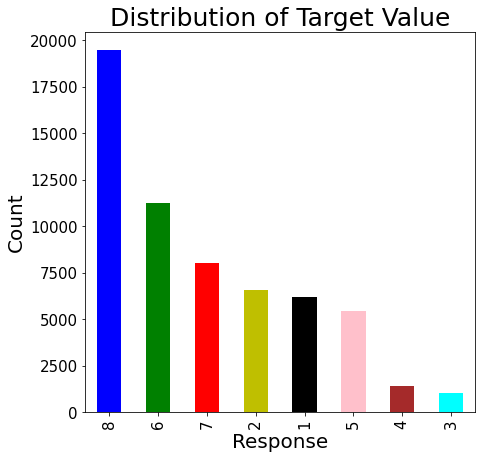

In [12]:
trainset['Response'].value_counts().plot(kind='bar',color=['b','g','r','y','black','pink','brown','cyan'],figsize=(7,7))
plt.xlabel('Response',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Distribution of Target Value',fontsize=25)
plt.show()

## Trainset Categorization (Categorical or Numerical)

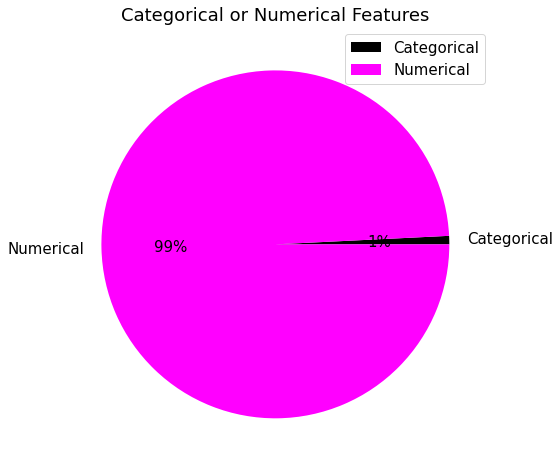

In [13]:
def List_Table(L):
    Table = pd.DataFrame(columns = ['Column Title'])
    for i in L: 
        Table = Table.append({'Column Title':i},ignore_index = True )
    Table = Table.T.style.set_properties(**{'font-size': '10pt','border': '1.3px solid black','color': 'magenta'})
    return Table


categorical = [col for col in trainset.columns if trainset[col].dtypes == "object"]
display(List_Table(categorical).set_caption('Categorical Features:'))
print('\n')


numerical = [col for col in trainset.columns if trainset[col].dtypes != "object"]
display(List_Table(numerical).set_caption('Numerical Features:'))
print('\n\n')


fig, ax = plt.subplots(figsize=(12, 8)) 
colors = ['black' , 'magenta']
ax.pie([len(categorical), len(numerical)], labels =['Categorical', 'Numerical'], wedgeprops={'width':1}, startangle=0, autopct = '%1.0f%%', colors=colors)
ax.legend(loc = 'best')
plt.title('Categorical or Numerical Features')
plt.show()


## Preprocessing section:

* Checking duplicate records
* Dealing with missing values using drop and imputation methods
* Splitting the trainset

#### Check duplicate/missing values

In [14]:
trainset.duplicated().value_counts()

False    59381
dtype: int64

In [15]:
testset.duplicated().value_counts()

False    19765
dtype: int64

In the case of excisting duplicated records in the trainset, they will be removed by:

In [16]:
#modified_trainset=trainset.drop_duplicates()
#modified_trainset.info()
#modified_testset=testset.drop_duplicates()
#modified_testset.info()

In [17]:
null_columns = trainset.columns[trainset.isnull().any()]
print('The number of null values in each column:\n')
print(trainset[null_columns].isnull().sum())


The number of null values in each column:

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64


In [18]:
null_columns = testset.columns[testset.isnull().any()]
print('The number of null values in each column:\n')
print(testset[null_columns].isnull().sum())

The number of null values in each column:

Employment_Info_1          3
Employment_Info_4       2137
Employment_Info_6       3787
Insurance_History_5     8105
Family_Hist_2           9880
Family_Hist_3          11064
Family_Hist_4           6677
Family_Hist_5          13624
Medical_History_1       2972
Medical_History_10     19564
Medical_History_15     14864
Medical_History_24     18585
Medical_History_32     19414
dtype: int64


In [19]:
print(trainset['Product_Info_2'].value_counts())
print(trainset['Product_Info_2'].value_counts().sum())

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64
59381


So, there is no missing value in categorical column 'Product_Info_2'.

###### Calculating the ratio of the number of null values to  the total number in each null column:

In [20]:
for col in null_columns:
    sum = trainset[col].isna().sum()
    length = len(trainset[col].index)
    ratio = sum/length
    print('the null ratio in', col, 'is: ', round(ratio*100,1), '%.')

the null ratio in Employment_Info_1 is:  0.0 %.
the null ratio in Employment_Info_4 is:  11.4 %.
the null ratio in Employment_Info_6 is:  18.3 %.
the null ratio in Insurance_History_5 is:  42.8 %.
the null ratio in Family_Hist_2 is:  48.3 %.
the null ratio in Family_Hist_3 is:  57.7 %.
the null ratio in Family_Hist_4 is:  32.3 %.
the null ratio in Family_Hist_5 is:  70.4 %.
the null ratio in Medical_History_1 is:  15.0 %.
the null ratio in Medical_History_10 is:  99.1 %.
the null ratio in Medical_History_15 is:  75.1 %.
the null ratio in Medical_History_24 is:  93.6 %.
the null ratio in Medical_History_32 is:  98.1 %.


Text(0.5, 1.0, 'Missingno Visualization')

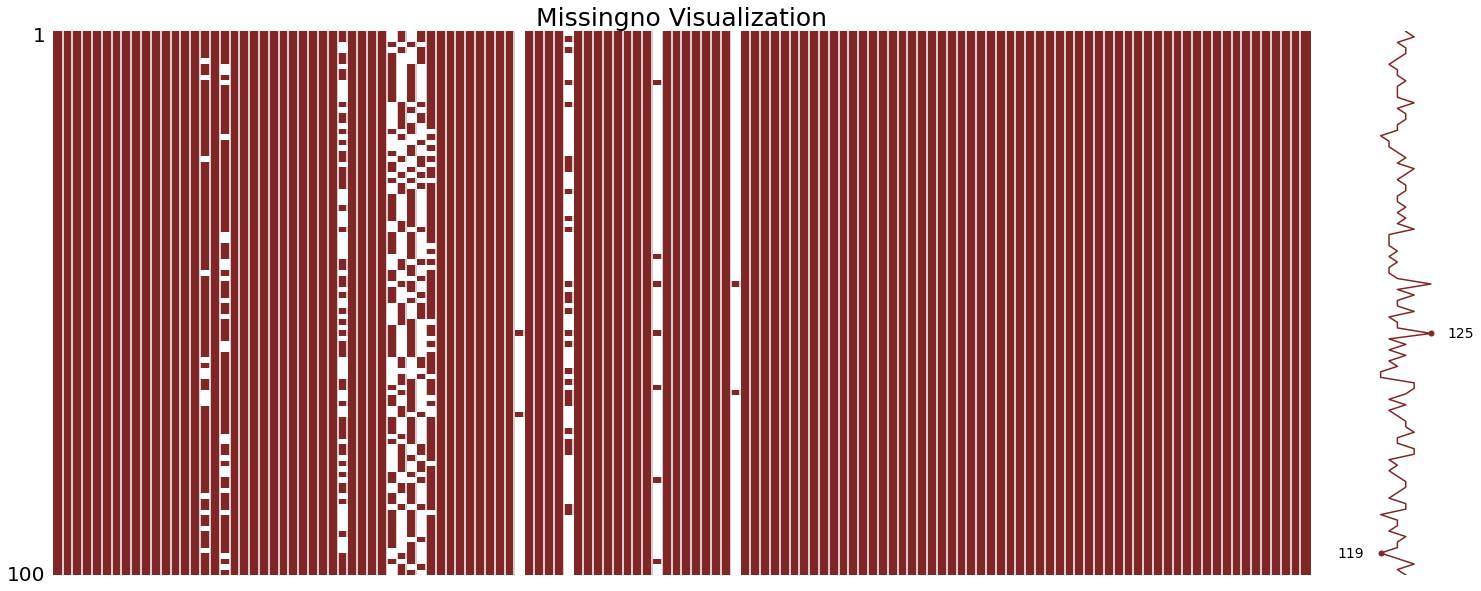

In [21]:
msno.matrix(trainset.sample(100),color = (0.5,0.15,0.15))
plt.title('Missingno Visualization', fontsize=25)

Text(0.5, 1.0, 'Missingno Visualization')

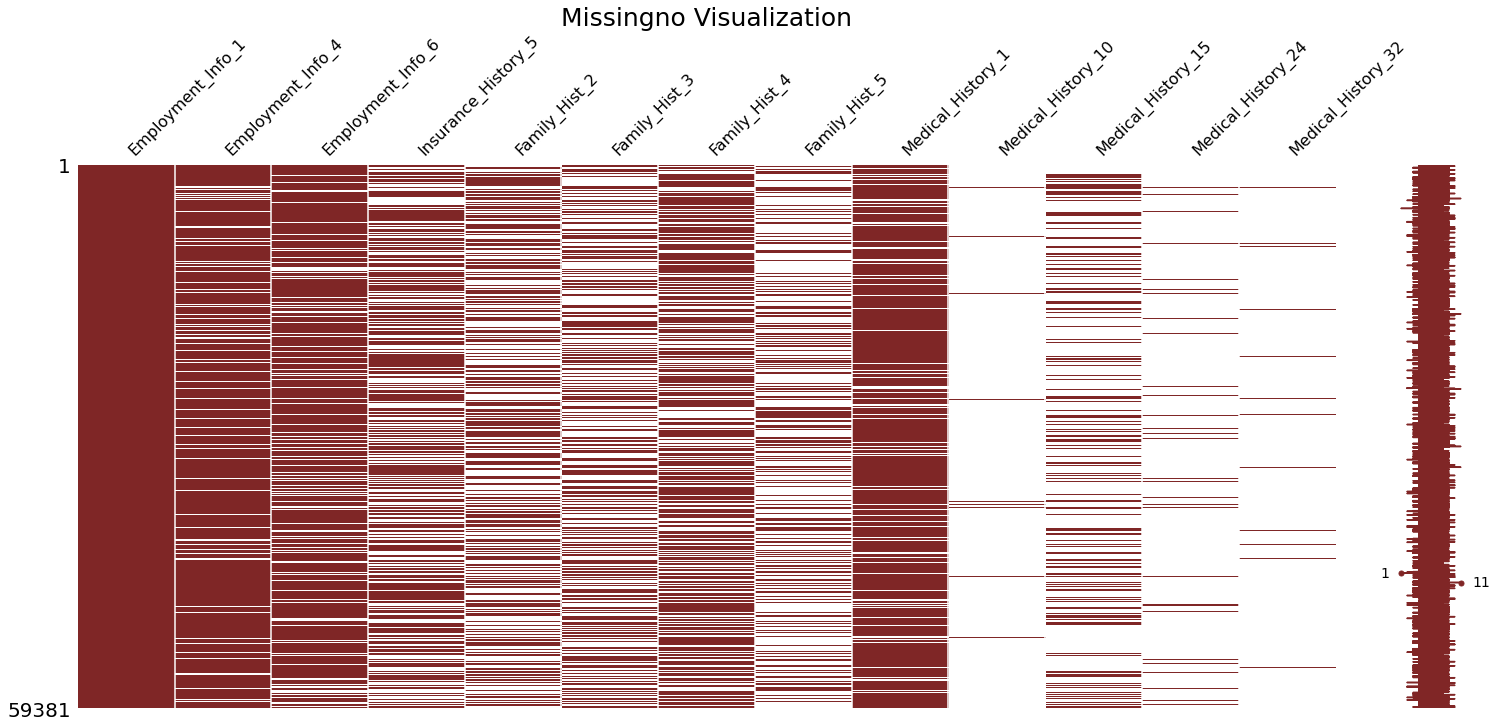

In [22]:
msno.matrix(trainset[(null_columns)],color = (0.5,0.15,0.15))
plt.title('Missingno Visualization', fontsize=25)

## Handling missing values 
We will handle missing values in two approaches: 
1. **Drop** (Dropping all columns in which there are more than 40 percent null values (=more than 60 percent non-NA values))
2. **Imputation** (completing missing values via imputation)


In [23]:
trainset_dropna = trainset.dropna(thresh=trainset.shape[0]*0.6, axis=1)
trainset_dropna


Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0          2               1             D3              10        0.076923   
1          5               1             A1              26        0.076923   
2          6               1             E1              26        0.076923   
3          7               1             D4              10        0.487179   
4          8               1             D2              26        0.230769   
...      ...             ...            ...             ...             ...   
59376  79142               1             D1              10        0.230769   
59377  79143               1             D3              26        0.230769   
59378  79144               1             E1              26        0.076923   
59379  79145               1             D2              10        0.230769   
59380  79146               1             A8              26        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0                   2               1               1  0.641791  0.581818   
1                   2               3               1  0.059701  0.600000   
2                   2               3               1  0.029851  0.745455   
3                   2               3               1  0.164179  0.672727   
4                   2               3               1  0.417910  0.654545   
...               ...             ...             ...       ...       ...   
59376               2               3               1  0.074627  0.709091   
59377               2               3               1  0.432836  0.800000   
59378               2               3               1  0.104478  0.745455   
59379               2               3               1  0.507463  0.690909   
59380               2               3               1  0.447761  0.781818   

       ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0      ...                   0                   0                   0   
1      ...                   0                   0                   0   
2      ...                   0                   0                   0   
3      ...                   0                   0                   0   
4      ...                   0                   0                   0   
...    ...                 ...                 ...                 ...   
59376  ...                   0                   0                   0   
59377  ...                   0                   0                   0   
59378  ...                   0                   0                   0   
59379  ...                   1                   0                   0   
59380  ...                   0                   0                   0   

       Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
59376                   0                   0                   0   
59377                   0                   0                   0   
59378                   0                   0                   0   
59379                   0                   0                   0   
59380                   0                   0                   0   

       Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                       0                   0                   0         8  
1                       0                   0                   0         4  
2                       0                   0                   0         8  
3                       0                   0                   0         8  
4                       0   

In [24]:
testset_dropna = testset.dropna(thresh= testset.shape[0]*0.6, axis=1)
testset_dropna


Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0          1               1             D3              26        0.487179   
1          3               1             A2              26        0.076923   
2          4               1             D3              26        0.144667   
3          9               1             A1              26        0.151709   
4         12               1             A1              26        0.076923   
...      ...             ...            ...             ...             ...   
19760  79093               1             D3              26        0.128205   
19761  79099               1             D4              10        0.230769   
19762  79102               1             A2              26        0.076923   
19763  79125               1             D1              26        0.487179   
19764  79129               1             D3              26        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0                   2               3               1  0.611940  0.781818   
1                   2               3               1  0.626866  0.727273   
2                   2               3               1  0.582090  0.709091   
3                   2               1               1  0.522388  0.654545   
4                   2               3               1  0.298507  0.672727   
...               ...             ...             ...       ...       ...   
19760               2               3               1  0.537313  0.636364   
19761               2               3               1  0.134328  0.618182   
19762               2               3               1  0.850746  0.727273   
19763               2               3               1  0.522388  0.745455   
19764               2               1               1  0.343284  0.781818   

       ...  Medical_Keyword_39  Medical_Keyword_40  Medical_Keyword_41  \
0      ...                   0                   0                   0   
1      ...                   0                   0                   0   
2      ...                   0                   0                   0   
3      ...                   0                   0                   0   
4      ...                   0                   0                   0   
...    ...                 ...                 ...                 ...   
19760  ...                   0                   0                   0   
19761  ...                   0                   0                   0   
19762  ...                   0                   0                   0   
19763  ...                   0                   0                   0   
19764  ...                   0                   0                   0   

       Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
19760                   0                   0                   0   
19761                   0                   0                   0   
19762                   0                   0                   0   
19763                   0                   0                   0   
19764                   0                   0                   0   

       Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   1   
4                       0                   0                   0   
... 

In imputation approach, we will try to **fill the missed values** by putting **the average of the values in the column** of the missed value. 

In [25]:
trainset_imputed=trainset_dropna.copy()
NEW=trainset_imputed.drop('Product_Info_2',axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
final_trainset=pd.DataFrame((imputer.fit_transform(NEW)), columns = NEW.columns, index = NEW.index)
final_trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 119 entries, Id to Response
dtypes: float64(119)
memory usage: 53.9 MB


In [26]:
testset_imputed=testset_dropna.copy()
NEWW=testset_imputed.drop('Product_Info_2',axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
final_testset=pd.DataFrame((imputer.fit_transform(NEWW)), columns = NEWW.columns, index = NEWW.index)
final_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 118 entries, Id to Medical_Keyword_48
dtypes: float64(118)
memory usage: 17.8 MB


Now we will check how are the results after performing imputation.


In [27]:
final_trainset.isnull().sum()

Id                    0
Product_Info_1        0
Product_Info_3        0
Product_Info_4        0
Product_Info_5        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 119, dtype: int64

Here we will check out the number of the records in the dataset after applying imputation. 

In [28]:
final_testset.isnull().sum()

Id                    0
Product_Info_1        0
Product_Info_3        0
Product_Info_4        0
Product_Info_5        0
                     ..
Medical_Keyword_44    0
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Length: 118, dtype: int64

In [29]:
final_trainset

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
0          2.0             1.0            10.0        0.076923   
1          5.0             1.0            26.0        0.076923   
2          6.0             1.0            26.0        0.076923   
3          7.0             1.0            10.0        0.487179   
4          8.0             1.0            26.0        0.230769   
...        ...             ...             ...             ...   
59376  79142.0             1.0            10.0        0.230769   
59377  79143.0             1.0            26.0        0.230769   
59378  79144.0             1.0            26.0        0.076923   
59379  79145.0             1.0            10.0        0.230769   
59380  79146.0             1.0            26.0        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0                 2.0             1.0             1.0  0.641791  0.581818   
1                 2.0             3.0             1.0  0.059701  0.600000   
2                 2.0             3.0             1.0  0.029851  0.745455   
3                 2.0             3.0             1.0  0.164179  0.672727   
4                 2.0             3.0             1.0  0.417910  0.654545   
...               ...             ...             ...       ...       ...   
59376             2.0             3.0             1.0  0.074627  0.709091   
59377             2.0             3.0             1.0  0.432836  0.800000   
59378             2.0             3.0             1.0  0.104478  0.745455   
59379             2.0             3.0             1.0  0.507463  0.690909   
59380             2.0             3.0             1.0  0.447761  0.781818   

             Wt  ...  Medical_Keyword_40  Medical_Keyword_41  \
0      0.148536  ...                 0.0                 0.0   
1      0.131799  ...                 0.0                 0.0   
2      0.288703  ...                 0.0                 0.0   
3      0.205021  ...                 0.0                 0.0   
4      0.234310  ...                 0.0                 0.0   
...         ...  ...                 ...                 ...   
59376  0.320084  ...                 0.0                 0.0   
59377  0.403766  ...                 0.0                 0.0   
59378  0.246862  ...                 0.0                 0.0   
59379  0.276151  ...                 1.0                 0.0   
59380  0.382845  ...                 0.0                 0.0   

       Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
...                   ...                 ...                 ...   
59376                 0.0                 0.0                 0.0   
59377                 0.0                 0.0                 0.0   
59378                 0.0                 0.0                 0.0   
59379                 0.0                 0.0                 0.0   
59380                 0.0                 0.0                 0.0   

       Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
...                   ...                 ...                 ...   
59376                 0.0                 0.0                 0.0   
59377                 0.0                 0.0                 0.0   
59378                 0.0                 0.0                 0.0   
59379 

As we can see from the results above, we didn't miss any records but we filled all the missed values. 

# **Visualizations On Numerical Features**

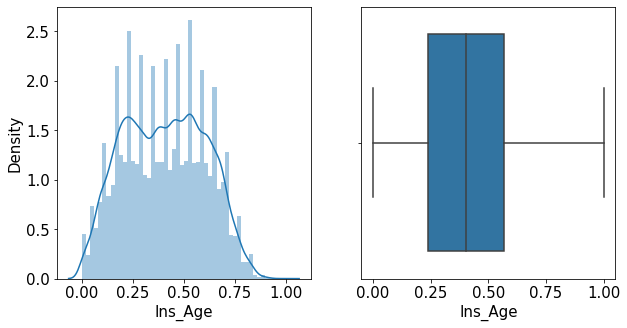

In [30]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['Ins_Age'], ax=axes[0])
sns.boxplot(final_trainset['Ins_Age'], ax=axes[1])

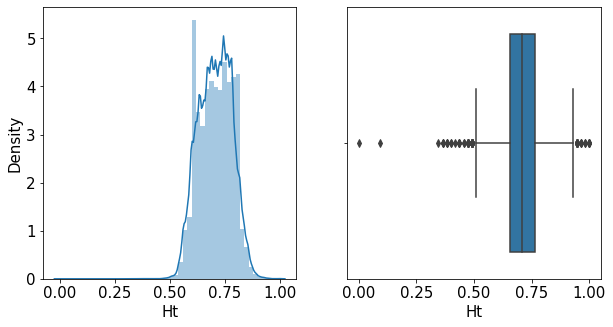

In [31]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['Ht'], ax=axes[0])
sns.boxplot(final_trainset['Ht'], ax=axes[1])

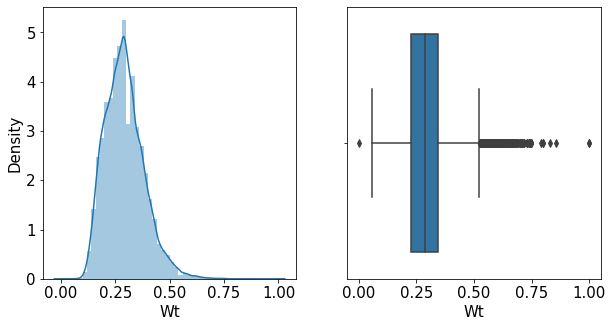

In [32]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['Wt'], ax=axes[0])
sns.boxplot(final_trainset['Wt'], ax=axes[1])

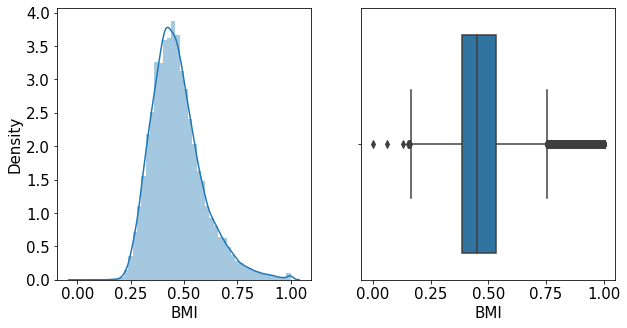

In [33]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['BMI'], ax=axes[0])
sns.boxplot(final_trainset['BMI'], ax=axes[1])

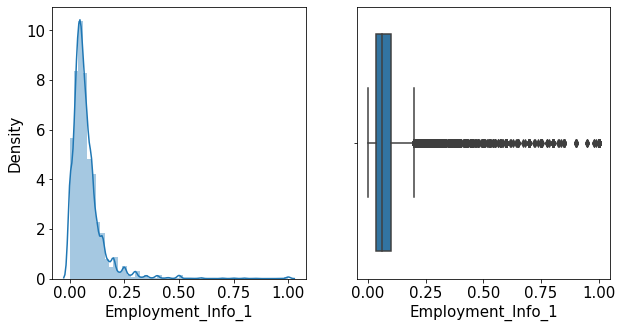

In [34]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['Employment_Info_1'], ax=axes[0])
sns.boxplot(final_trainset['Employment_Info_1'], ax=axes[1])

Right skewed distributions occur when the long tail is on the right side of the distribution. Analysts also refer to them as positively skewed. This condition occurs because probabilities taper off more slowly for higher values.</br>Outliers can be seen.

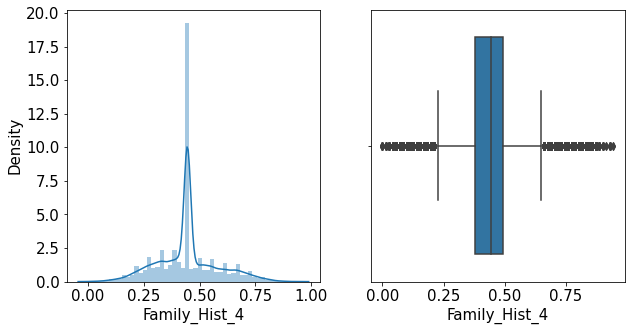

In [35]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(final_trainset['Family_Hist_4'], ax=axes[0])
sns.boxplot(final_trainset['Family_Hist_4'], ax=axes[1])

# **Correlation Checking**

Response               1.000000
BMI                    0.381601
Wt                     0.351395
Medical_History_23     0.286584
Medical_Keyword_15     0.259169
                         ...   
Medical_History_26     0.000796
Medical_History_36     0.000760
Medical_History_25     0.000585
Id                     0.000462
Insurance_History_4    0.000047
Name: Response, Length: 119, dtype: float64

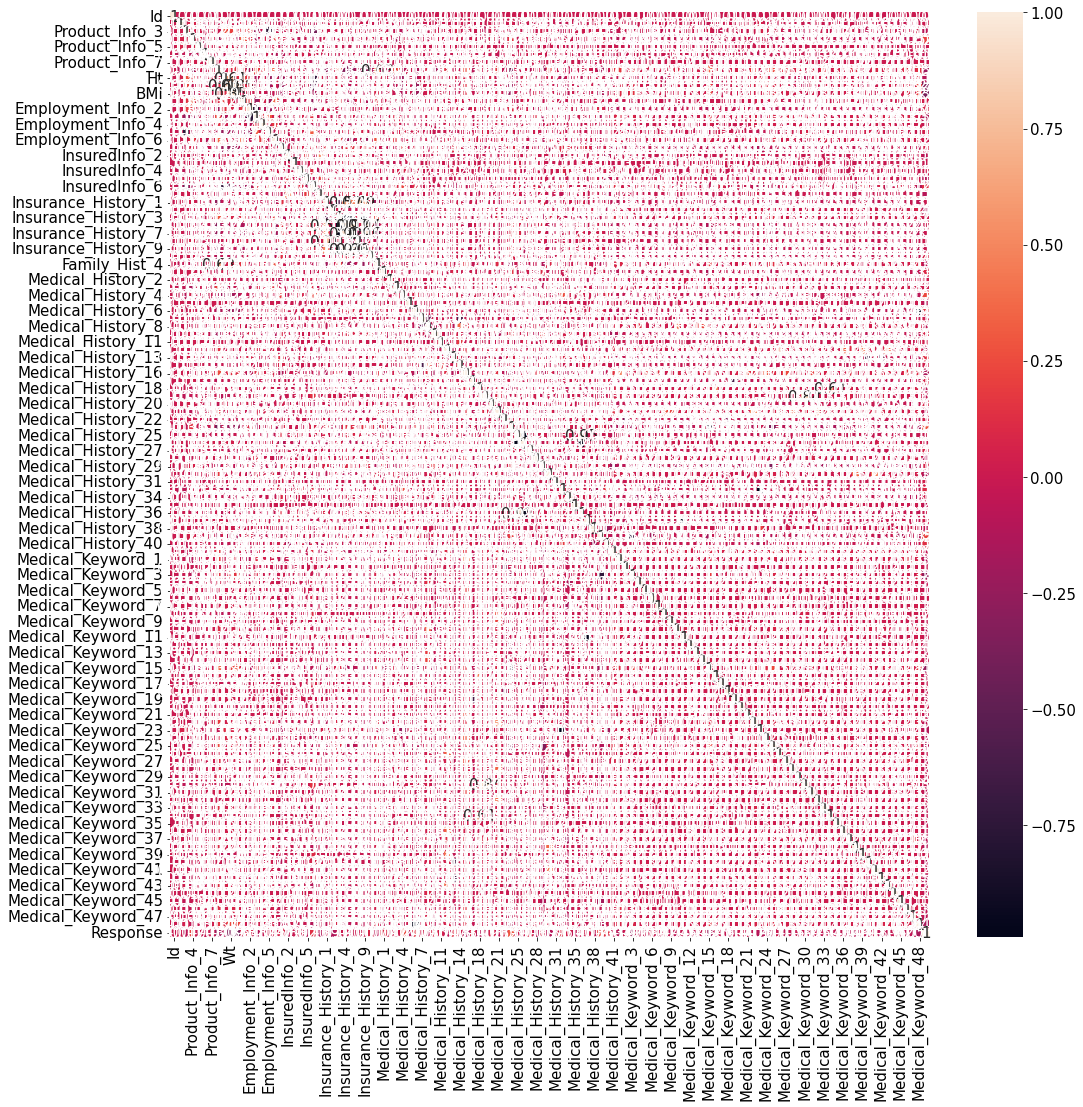

In [36]:

fig, ax = plt.subplots(figsize=(17,17))
correlation_matrix = final_trainset.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)
correlation = final_trainset.corr()['Response'].abs().sort_values(ascending = False)
correlation_matrix
correlation



In [37]:
corr = final_trainset.corr()
corr_greater_than_8 = corr[corr>.8]
corr_greater_than_8.to_csv('corr.csv',index=False)
corr_greater_than_8

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                  1.0             NaN             NaN             NaN   
Product_Info_1      NaN             1.0             NaN             NaN   
Product_Info_3      NaN             NaN             1.0             NaN   
Product_Info_4      NaN             NaN             NaN             1.0   
Product_Info_5      NaN             NaN             NaN             NaN   
...                 ...             ...             ...             ...   
Medical_Keyword_45  NaN             NaN             NaN             NaN   
Medical_Keyword_46  NaN             NaN             NaN             NaN   
Medical_Keyword_47  NaN             NaN             NaN             NaN   
Medical_Keyword_48  NaN             NaN             NaN             NaN   
Response            NaN             NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Id                             NaN             NaN             NaN      NaN   
Product_Info_1                 NaN             NaN             NaN      NaN   
Product_Info_3                 NaN             NaN             NaN      NaN   
Product_Info_4                 NaN             NaN             NaN      NaN   
Product_Info_5                 1.0             NaN             NaN      NaN   
...                            ...             ...             ...      ...   
Medical_Keyword_45             NaN             NaN             NaN      NaN   
Medical_Keyword_46             NaN             NaN             NaN      NaN   
Medical_Keyword_47             NaN             NaN             NaN      NaN   
Medical_Keyword_48             NaN             NaN             NaN      NaN   
Response                       NaN             NaN             NaN      NaN   

                    Ht  Wt  ...  Medical_Keyword_40  Medical_Keyword_41  \
Id                 NaN NaN  ...                 NaN                 NaN   
Product_Info_1     NaN NaN  ...                 NaN                 NaN   
Product_Info_3     NaN NaN  ...                 NaN                 NaN   
Product_Info_4     NaN NaN  ...                 NaN                 NaN   
Product_Info_5     NaN NaN  ...                 NaN                 NaN   
...                 ..  ..  ...                 ...                 ...   
Medical_Keyword_45 NaN NaN  ...                 NaN                 NaN   
Medical_Keyword_46 NaN NaN  ...                 NaN                 NaN   
Medical_Keyword_47 NaN NaN  ...                 NaN                 NaN   
Medical_Keyword_48 NaN NaN  ...                 NaN                 NaN   
Response           NaN NaN  ...                 NaN                 NaN   

                    Medical_Keyword_42  Medical_Keyword_43  \
Id                                 NaN                 NaN   
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 NaN   
Medical_Keyword_46                 NaN                 NaN   
Medical_Keyword_47                 NaN                 NaN   
Medical_Keyword_48                 NaN                 NaN   
Response                           NaN                 NaN   

                    Medical_Keyword_44  Medical_Keyword_45  \
Id                                 NaN                 NaN   
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 1.0   
Medical_Keyword_46           

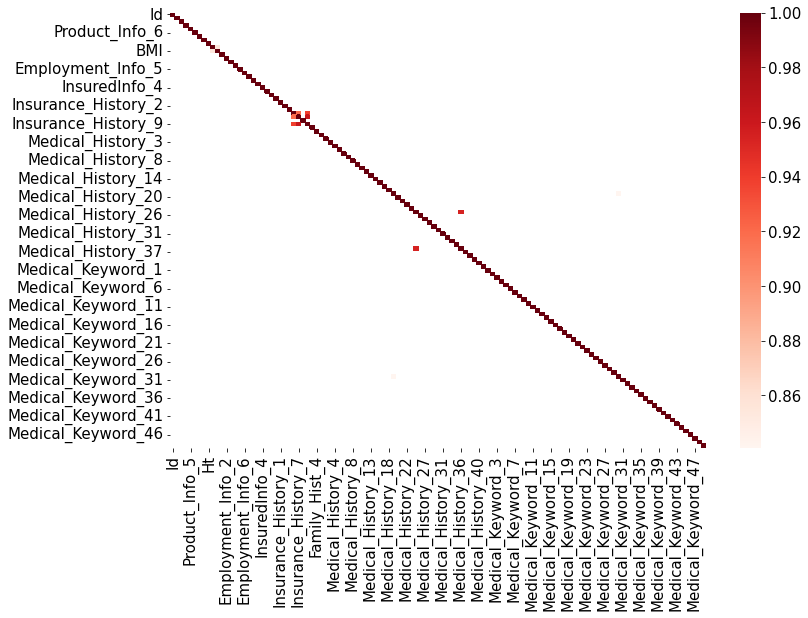

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_8, cmap="Reds");

### **CONCLUSION**

> BMI and Weight are highly correlated (0.85), which makes sense also as these 2 features are directly proprtional. 

> Insurance_History_4 and Insurance_History_7 are highly correlated (0.92)
> Insurance_History_4 and Insurance_History_9 are highly correlated (0.94)
> Insurance_History_7 and Insurance_History_9 are highly correlated (0.96)

> We are not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

# **X and Y split**


In [39]:
X=final_trainset.drop('Response', axis=1)
Y=final_trainset['Response']



X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size = 0.25, random_state=1)

print(X_train.shape,Y_train.shape)
print(X_valid.shape, Y_valid.shape)

(44535, 118) (44535,)
(14846, 118) (14846,)


## Models

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

GBCModel = GradientBoostingClassifier(random_state=0)

Support Vector Machine

In [41]:
#importing libraries
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [42]:
# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_svm = LinearSVC(dual=False, random_state=0, max_iter=1000)


# Nu-Support Vector Classification
nu_rbf_svm = SVC(kernel='rbf', probability=True, max_iter=1000, random_state=0)

# C-Support Vector Classification.

# linear
c_linear_svm = SVC(kernel='linear', probability=True, max_iter=1000, random_state=0)

# poly
c_poly_svm = SVC(kernel='poly',  probability=True, max_iter=1000, random_state=0)

# sigmoid
c_sigmoid_svm = SVC(kernel='sigmoid', probability=True, max_iter=1000, random_state=0)

# rbf
c_rbf_svm = SVC(kernel='rbf', probability=True,  max_iter=1000, random_state=0)

## Parameters for Grid Search

GBC

In [43]:
# GBCparams = {'learning_rate': [1, 1e-01, 1e-001],'n_estimators': [10, 100, 250, 500, 1000]}

Support Vector Machine

In [44]:
# # Linear Support Vector Classification
# linear_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                     'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}

# # Nu-Support Vector Classification
# nu_rbf_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                      'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}

# # Parameters for C-Support Vector Classification.

# # linear
# c_linear_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                      'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}

# # rbf
# c_rbf_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                      'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# # poly
# c_poly_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                      'degree': [0, 1, 2, 3, 4, 5, 6],
#                      'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}

# # sigmoid
# c_sigmoid_svm_param = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
#                      'tolerance': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}

We have commented out the grid search because this takes several hours to run. We have included the best parameters from the grid search in the code below.


In [45]:
# start = datetime.now()

# GBCGridSearchResult = GridSearcher(GBCmodel, params)
# print(GridSearchResult.best_params_)

# end = datetime.now()
# duration = end - start
# dur = divmod(duration.seconds, 60)
# print("Total Duration: ", dur[0], 'minutes', dur[1], 'seconds')

# print(GBCGridSearchResult.best_params_)


# Models with Optimized Parameters

Set the optimal parameters for the Gradient Boosting classifier, Softmax classifier and Support Vector Machine

In [46]:
# Optimal params for Gradient Boosting Classifier found from running GridSearcher on params = {'learning_rate': [1, 1e-01, 1e-001],'n_estimators': [10, 100, 250, 500, 1000]}
model_opt_params_GBC = {'learning_rate': 0.1, 'n_estimators': 250}
optimized_gbc_model = GradientBoostingClassifier(n_estimators=250, learning_rate = 0.1, random_state=0)

# Optimized pararameters for Logistic Regression is tolerance = 0.0001, C = 100.0. Found with grid Search
softmax_base = LogisticRegression(random_state=0, solver='liblinear')
optimized_softmax_model = LogisticRegression(random_state=0, tol = 0.0001, C = 100.0, solver='liblinear')

Optimized Parameters

In [47]:
# Support Vector Classification on different kernels 

# Linear Support Vector Classification
opt_linear_svm = LinearSVC(C = 100, tol = 0.001, dual=False, random_state=0, max_iter=1000)

# Nu-Support Vector Classification
opt_nu_rbf_svm = SVC(C = 10, tol = 0.01, kernel='rbf', probability=True, max_iter=1000, random_state=0)

# C-Support Vector Classification.

# linear
opt_c_linear_svm = SVC(C = 1.0, tol = 0.1, kernel='linear', probability=True, max_iter=1000, random_state=0)

# poly
opt_c_poly_svm = SVC(C = 0.1, degree = 6, tol = 0.1, kernel='poly',  probability=True, max_iter=1000, random_state=0)

# sigmoid
opt_c_sigmoid_svm = SVC(C = 1.0, tol = 0.01, kernel='sigmoid', probability=True, max_iter=1000, random_state=0)

# rbf
opt_c_rbf_svm = SVC(C = 10, tol = 0.01, kernel='rbf', probability=True,  max_iter=1000, random_state=0)

https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [48]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()

Y_train_transformed = labenc.fit_transform(Y_train)
Y_valid_transformed = labenc.transform(Y_valid)
Y_valid_transformed = labenc.transform(Y_valid)

## Train models on training data

In [49]:
# Train the optimised model
from datetime import datetime

start = datetime.now()
print("Training started at:",start.strftime("%H:%M:%S"))
# GBC
trained_gbc_model = optimized_gbc_model.fit(X_train, Y_train_transformed)
# Softmax
trained_softmax_model = optimized_softmax_model.fit(X_train, Y_train_transformed)

# Support Vector Classification on different kernels

# Linear Support Vector Classification
trained_linear_svm = opt_linear_svm.fit(X_train, Y_train_transformed)
# Nu-Support Vector Classification
trained_nu_rbf_svm = opt_nu_rbf_svm.fit(X_train, Y_train_transformed)
# C-Support Vector Classification.
# linear
trained_c_linear_svm = opt_c_linear_svm.fit(X_train, Y_train_transformed)
# poly
trained_c_poly_svm = opt_c_poly_svm.fit(X_train, Y_train_transformed)
# sigmoid
trained_c_sigmoid_svm = opt_c_sigmoid_svm.fit(X_train, Y_train_transformed)
# rbf
trained_c_rbf_svm = opt_c_rbf_svm.fit(X_train, Y_train_transformed)

end = datetime.now()
print("Training finished at:",end.strftime("%H:%M:%S"))
duration = end - start
dur = divmod(duration.seconds, 60)
print("Total Duration for model training: ", dur[0], 'minutes', dur[1], 'seconds')

Training started at: 12:46:52
Training finished at: 13:31:06
Total Duration for model training:  44 minutes 13 seconds


## Calibrate models on validation data

In [50]:
from sklearn.calibration import CalibratedClassifierCV

# GBC
gbc_model_calibrated = CalibratedClassifierCV(base_estimator=trained_gbc_model, method="isotonic", cv="prefit").fit(X_valid, Y_valid_transformed)

# Softmax
softmax_model_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)
# Nu-Support Vector Classification
nu_rbf_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)
# C-Support Vector Classification.
# linear
c_linear_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)
# poly
c_poly_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)
# sigmoid
c_sigmoid_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)
# rbf
c_rbf_svm_calibrated = CalibratedClassifierCV(trained_softmax_model, cv='prefit', method='isotonic').fit(X_valid, Y_valid_transformed)

The function below returns calibrated probabilities of classification according to each class on an array of test vectors X.

In [51]:
# GBC
gbc_val_pred_proba = gbc_model_calibrated.predict_proba(X_valid)

# Softmax
softmax_val_pred_proba = softmax_model_calibrated.predict_proba(X_valid)

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_svm_val_pred_prob = linear_svm_calibrated.predict_proba(X_valid)
# Nu-Support Vector Classification
nu_rbf_svm_val_pred_prob = nu_rbf_svm_calibrated.predict_proba(X_valid)

# C-Support Vector Classification.
# linear
c_linear_svm_val_pred_prob = c_linear_svm_calibrated.predict_proba(X_valid)
# poly
c_poly_svm_val_pred_prob = c_poly_svm_calibrated.predict_proba(X_valid)
# sigmoid
c_sigmoid_svm_val_pred_prob = c_sigmoid_svm_calibrated.predict_proba(X_valid)
# rbf
c_rbf_svm_val_pred_prob = c_rbf_svm_calibrated.predict_proba(X_valid)

# Save the trained model

In [52]:
# Save the trained model
import pickle

#Gradient
gradient_boost = 'CalibratedGradientBoostingClassifier.sav'
pickle.dump(gbc_model_calibrated, open(gradient_boost, 'wb'))

#Softmax
softmax_model_saved = 'SoftmaxClassifier.sav'
pickle.dump(softmax_model_calibrated, open(softmax_model_saved, 'wb'))

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_svm_saved = 'linear_svm_Classifier.sav'
pickle.dump(linear_svm_calibrated, open(linear_svm_saved, 'wb'))

# Nu-Support Vector Classification
nu_rbf_svm_saved = 'nu_rbf_svm_Classifier.sav'
pickle.dump(nu_rbf_svm_calibrated, open(nu_rbf_svm_saved, 'wb'))

# C-Support Vector Classification.

# linear
c_linear_svm_saved = 'c_linear_svmClassifier.sav'
pickle.dump(c_linear_svm_calibrated, open(c_linear_svm_saved, 'wb'))
# poly
c_poly_svm_saved = 'c_poly_svmClassifier.sav'
pickle.dump(c_poly_svm_calibrated, open(c_poly_svm_saved, 'wb'))
# sigmoid
c_sigmoid_svm_saved = 'c_sigmoid_svmClassifier.sav'
pickle.dump(c_sigmoid_svm_calibrated, open(c_sigmoid_svm_saved, 'wb'))
# rbf
c_rbf_svm_saved = 'c_rbf_svmClassifier.sav'
pickle.dump(c_rbf_svm_calibrated, open(c_rbf_svm_saved, 'wb'))

We then want to transform labels back to original encoding.

In [53]:
# GBC
gbc_val_preds = np.argmax(gbc_val_pred_proba, axis=1)
gbc_val_classes = gbc_model_calibrated.classes_
gbc_val_preds = [gbc_val_classes[i] for i in gbc_val_preds]
gbc_val_preds = labenc.inverse_transform(gbc_val_preds)

# Softmax
softmax_val_preds = np.argmax(softmax_val_pred_proba, axis=1)
softmax_val_classes = softmax_model_calibrated.classes_
softmax_val_preds = [softmax_val_classes[i] for i in softmax_val_preds]
softmax_val_preds = labenc.inverse_transform(softmax_val_preds)

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_val_preds = np.argmax(linear_svm_val_pred_prob, axis=1)
linear_val_classes = linear_svm_calibrated.classes_
linear_val_preds = [linear_val_classes[i] for i in linear_val_preds]
linear_val_preds = labenc.inverse_transform(linear_val_preds)

# Nu-Support Vector Classification
nu_rbf_val_preds = np.argmax(nu_rbf_svm_val_pred_prob, axis=1)
nu_rbf_val_classes = nu_rbf_svm_calibrated.classes_
nu_rbf_val_preds = [nu_rbf_val_classes[i] for i in nu_rbf_val_preds]
nu_rbf_val_preds = labenc.inverse_transform(nu_rbf_val_preds)

# C-Support Vector Classification.

# linear
c_linear_val_preds = np.argmax(c_linear_svm_val_pred_prob, axis=1)
c_linear_val_classes = c_linear_svm_calibrated.classes_
c_linear_val_preds = [c_linear_val_classes[i] for i in c_linear_val_preds]
c_linear_val_preds = labenc.inverse_transform(c_linear_val_preds)

# poly
c_poly_val_preds = np.argmax(c_poly_svm_val_pred_prob, axis=1)
c_poly_val_classes = c_poly_svm_calibrated.classes_
c_poly_val_preds = [c_poly_val_classes[i] for i in c_poly_val_preds]
c_poly_val_preds = labenc.inverse_transform(c_poly_val_preds)

# sigmoid
c_sigmoid_val_preds = np.argmax(c_sigmoid_svm_val_pred_prob, axis=1)
c_sigmoid_val_classes = c_sigmoid_svm_calibrated.classes_
c_sigmoid_val_preds = [c_sigmoid_val_classes[i] for i in c_sigmoid_val_preds]
c_sigmoid_val_preds = labenc.inverse_transform(c_sigmoid_val_preds)

# rbf
c_rbf_val_preds = np.argmax(c_rbf_svm_val_pred_prob, axis=1)
c_rbf_val_classes = c_rbf_svm_calibrated.classes_
c_rbf_val_preds = [c_rbf_val_classes[i] for i in c_rbf_val_preds]
c_rbf_val_preds = labenc.inverse_transform(c_rbf_val_preds)

We then convert the validation dataset's encoded labels (0-7) back to the original set of classes (1-8)

And then we plot the ROC Curves. 
- The first curve is for the Gradient Boosting Classifier
    - Gradient boosting classifier has relatively few false positives, especially for class 3, 4, 5 and 8.

 
- The second curve is for the Softmax Classifier
    - Softmas has a lot of false positive rates, especially for class 2, 4, 5, 6 and 7. 






In [54]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'RBF C-Support Vector Classification')

<Figure size 432x288 with 0 Axes>

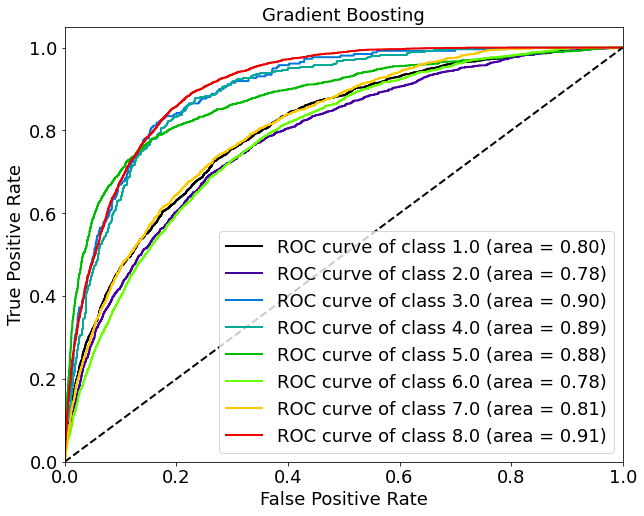

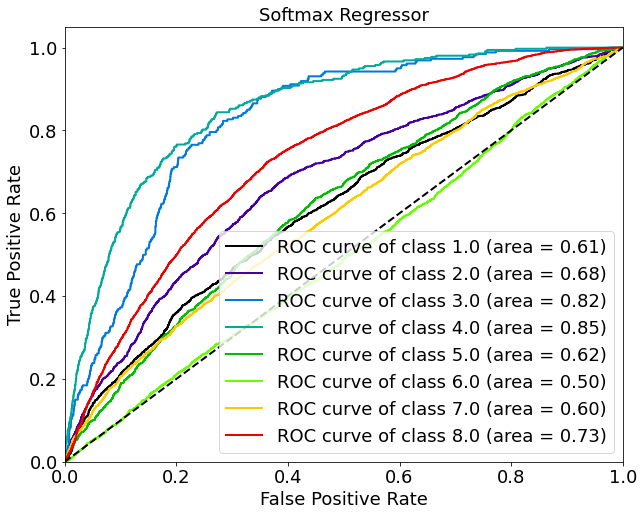

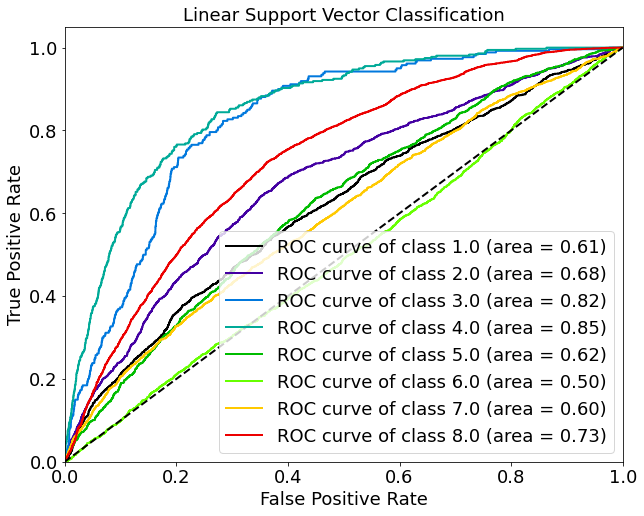

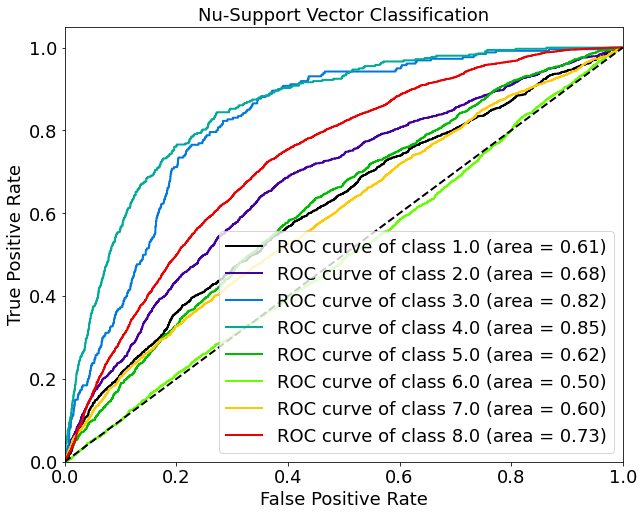

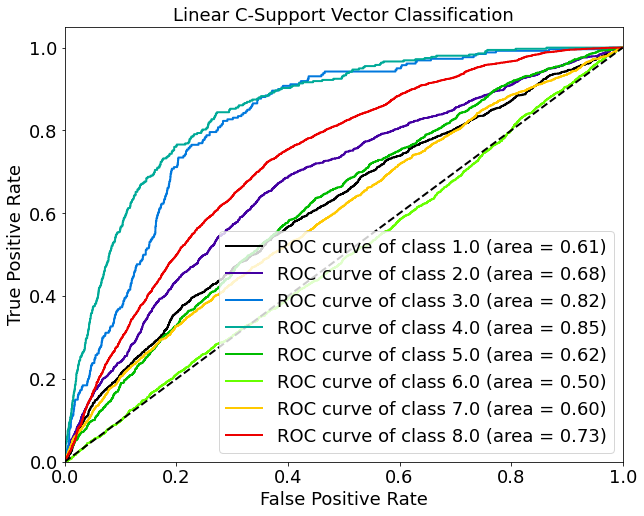

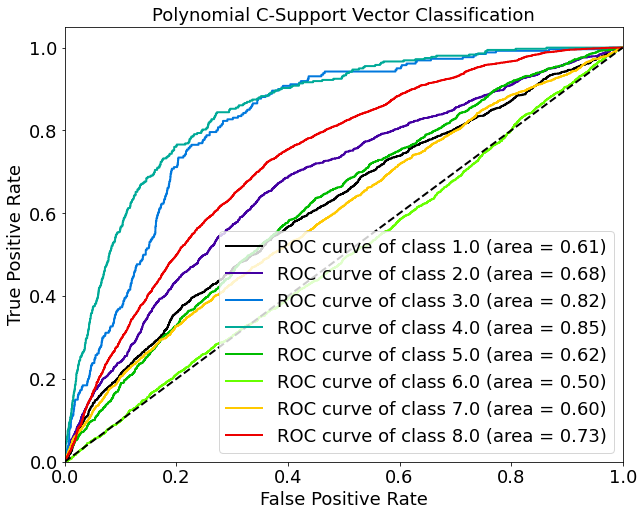

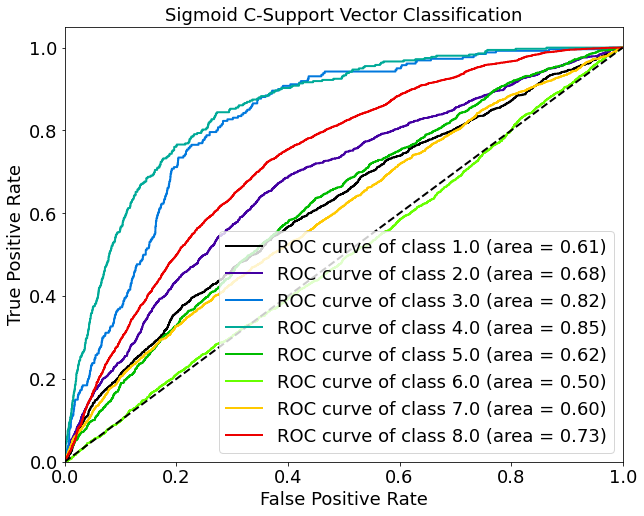

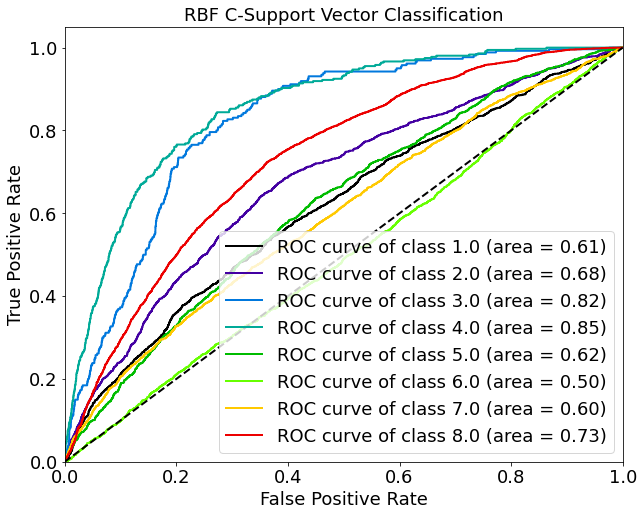

In [55]:
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score
plt.figure()
# Convert the validation dataset's encoded labels (0-7) back to the original set of classes (1-8)
Y_valid = labenc.inverse_transform(Y_valid_transformed)

# GBC
plot_roc(Y_valid, gbc_val_pred_proba, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Gradient Boosting')

# Softmax
plot_roc(Y_valid,softmax_val_pred_proba, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Softmax Regressor')

# Support Vector Classification on different kernels 
# Linear Support Vector Classification
plot_roc(Y_valid,linear_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Linear Support Vector Classification')

# Nu-Support Vector Classification
plot_roc(Y_valid,nu_rbf_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Nu-Support Vector Classification')

# C-Support Vector Classification.
# linear
plot_roc(Y_valid,c_linear_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Linear C-Support Vector Classification')

# poly
plot_roc(Y_valid,c_poly_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Polynomial C-Support Vector Classification')

# sigmoid
plot_roc(Y_valid,c_sigmoid_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('Sigmoid C-Support Vector Classification')

# rbf
plot_roc(Y_valid,c_rbf_svm_val_pred_prob, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('RBF C-Support Vector Classification')

In [56]:
print(Y_valid.shape,c_rbf_svm_val_pred_prob.shape)

(14846,) (14846, 8)


We then print the classification report for both models, which is a text summary of the precision, recall, F1 score for each class.

In [57]:
# GBC Model
print('Classification Report of Gaussian Model',classification_report(Y_valid, gbc_val_preds))

# Softmax
print('Classification Report of Softmax Model',classification_report(Y_valid, softmax_val_preds))

# Support Vector Classification on different kernels 
# Linear Support Vector Classification
print('Classification Report of Linear Support Vector Classification', classification_report(Y_valid, linear_val_preds))

# Nu-Support Vector Classification
print('Classification Report of Nu-Support Vector Classification',classification_report(Y_valid, nu_rbf_val_preds))

# C-Support Vector Classification.
# linear
print('Classification Report of Linear C-Support Vector Classification',classification_report(Y_valid, c_linear_val_preds))

# poly
print('Classification Report of Ploynomial C-Support Vector Classification',classification_report(Y_valid, c_poly_val_preds))

# sigmoid
print('Classification Report of Sigmoid C-Support Vector Classification',classification_report(Y_valid, c_sigmoid_val_preds))

# rbf
print('Classification Report of Radial Basis Function C-Support Vector Classification',classification_report(Y_valid, c_rbf_val_preds))

Classification Report of Gaussian Model               precision    recall  f1-score   support

         1.0       0.48      0.22      0.30      1602
         2.0       0.46      0.14      0.22      1636
         3.0       0.12      0.00      0.01       260
         4.0       0.26      0.02      0.03       359
         5.0       0.54      0.57      0.55      1361
         6.0       0.40      0.55      0.46      2771
         7.0       0.44      0.38      0.41      1996
         8.0       0.65      0.88      0.75      4861

    accuracy                           0.54     14846
   macro avg       0.42      0.35      0.34     14846
weighted avg       0.51      0.54      0.49     14846

Classification Report of Softmax Model               precision    recall  f1-score   support

         1.0       0.23      0.03      0.05      1602
         2.0       0.23      0.31      0.26      1636
         3.0       0.00      0.00      0.00       260
         4.0       0.00      0.00      0.00       359

We normalize the confusion matrices so that each row sums to 1. This makes it easier to compare the error rates of the models.




Text(0.5, 1.0, 'RBF C-Support Vector Classification')

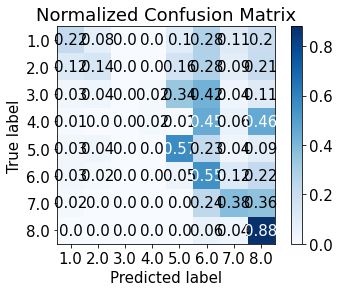

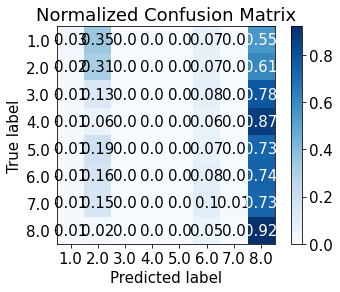

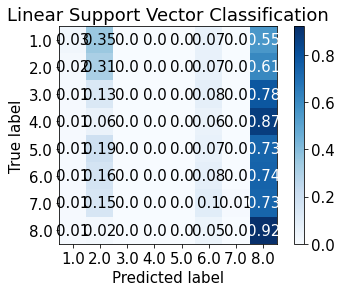

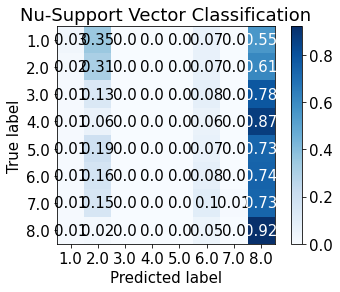

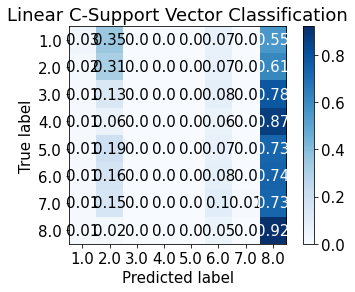

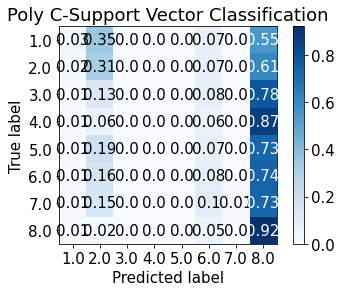

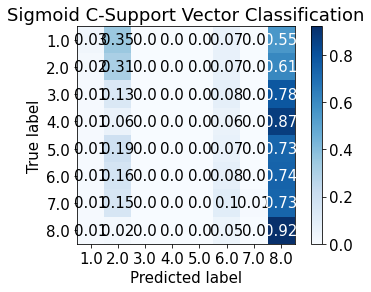

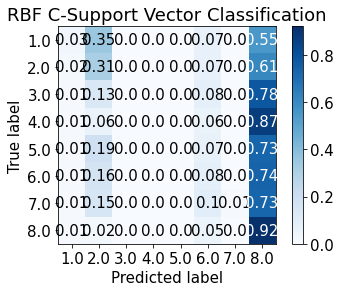

In [58]:
# GBC
plot_confusion_matrix(Y_valid, gbc_val_preds, normalize=True)

# Softmax
plot_confusion_matrix(Y_valid, softmax_val_preds, normalize=True)

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
plot_confusion_matrix(Y_valid, linear_val_preds, normalize=True)
plt.title('Linear Support Vector Classification')
# Nu-Support Vector Classification
plot_confusion_matrix(Y_valid, nu_rbf_val_preds, normalize=True)
plt.title('Nu-Support Vector Classification')
# C-Support Vector Classification.

# linear
plot_confusion_matrix(Y_valid, c_linear_val_preds, normalize=True)
plt.title('Linear C-Support Vector Classification')
# poly
plot_confusion_matrix(Y_valid, c_poly_val_preds, normalize=True)
plt.title('Poly C-Support Vector Classification')
# sigmoid
plot_confusion_matrix(Y_valid, c_sigmoid_val_preds, normalize=True)
plt.title('Sigmoid C-Support Vector Classification')
# rbf
plot_confusion_matrix(Y_valid, c_rbf_val_preds, normalize=True)
plt.title('RBF C-Support Vector Classification')

##Generate Predictions

In [59]:
# gbc
gbc_model_test_pred_proba = gbc_model_calibrated.predict_proba(X_valid)
gbc_model_test_preds = np.argmax(gbc_model_test_pred_proba, axis=1)
gbc_model_test_classes = gbc_model_calibrated.classes_
gbc_model_test_preds = [gbc_model_test_classes[i] for i in gbc_model_test_preds]
gbc_model_test_preds = labenc.inverse_transform(gbc_model_test_preds)


# softmax
softmax_model_test_pred_proba = softmax_model_calibrated.predict_proba(X_valid)
softmax_model_test_preds = np.argmax(softmax_model_test_pred_proba, axis=1)
softmax_model_test_classes = softmax_model_calibrated.classes_
softmax_model_test_preds = [softmax_model_test_classes[i] for i in softmax_model_test_preds]
softmax_model_test_preds = labenc.inverse_transform(softmax_model_test_preds)

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
linear_svm_test_pred_proba = linear_svm_calibrated.predict_proba(X_valid)
linear_svm_test_preds = np.argmax(linear_svm_test_pred_proba, axis=1)
linear_svm_test_classes = linear_svm_calibrated.classes_
linear_svm_test_preds = [linear_svm_test_classes[i] for i in linear_svm_test_preds]
linear_svm_test_preds = labenc.inverse_transform(linear_svm_test_preds)

# Nu-Support Vector Classification
nu_rbf_svm_test_pred_proba = nu_rbf_svm_calibrated.predict_proba(X_valid)
nu_rbf_svm_test_preds = np.argmax(nu_rbf_svm_test_pred_proba, axis=1)
nu_rbf_svm_test_classes = nu_rbf_svm_calibrated.classes_
nu_rbf_svm_test_preds = [nu_rbf_svm_test_classes[i] for i in nu_rbf_svm_test_preds]
nu_rbf_svm_test_preds = labenc.inverse_transform(nu_rbf_svm_test_preds)

# C-Support Vector Classification.

# linear
c_linear_svm_test_pred_proba = c_linear_svm_calibrated.predict_proba(X_valid)
c_linear_svm_test_preds = np.argmax(c_linear_svm_test_pred_proba, axis=1)
c_linear_svm_test_classes = c_linear_svm_calibrated.classes_
c_linear_svm_test_preds = [c_linear_svm_test_classes[i] for i in c_linear_svm_test_preds]
c_linear_svm_test_preds = labenc.inverse_transform(c_linear_svm_test_preds)

# poly
c_poly_svm_test_pred_proba = c_poly_svm_calibrated.predict_proba(X_valid)
c_poly_svm_test_preds = np.argmax(c_poly_svm_test_pred_proba, axis=1)
c_poly_svm_test_classes = c_poly_svm_calibrated.classes_
c_poly_svm_test_preds = [c_poly_svm_test_classes[i] for i in c_poly_svm_test_preds]
c_poly_svm_test_preds = labenc.inverse_transform(c_poly_svm_test_preds)

# sigmoid
c_sigmoid_svm_test_pred_proba = c_sigmoid_svm_calibrated.predict_proba(X_valid)
c_sigmoid_svm_test_preds = np.argmax(c_sigmoid_svm_test_pred_proba, axis=1)
c_sigmoid_svm_test_classes = c_sigmoid_svm_calibrated.classes_
c_sigmoid_svm_test_preds = [c_sigmoid_svm_test_classes[i] for i in c_sigmoid_svm_test_preds]
c_sigmoid_svm_test_preds = labenc.inverse_transform(c_sigmoid_svm_test_preds)

# rbf
c_rbf_svm_test_pred_proba = c_rbf_svm_calibrated.predict_proba(X_valid)
c_rbf_svm_test_preds = np.argmax(c_rbf_svm_test_pred_proba, axis=1)
c_rbf_svm_test_classes = c_rbf_svm_calibrated.classes_
c_rbf_svm_test_preds = [c_rbf_svm_test_classes[i] for i in c_rbf_svm_test_preds]
c_rbf_svm_test_preds = labenc.inverse_transform(c_rbf_svm_test_preds)

In [60]:
# Load the saved model
loaded_gbc_model = pickle.load(open(gradient_boost
                                    , 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_gbc_model_test_predProb = loaded_gbc_model.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_gbc_model_test_preds = np.argmax(loaded_gbc_model_test_predProb, axis=1)
loaded_gbc_model_test_classes = loaded_gbc_model.classes_
loaded_gbc_model_test_preds = [loaded_gbc_model_test_classes[i] for i in loaded_gbc_model_test_preds]
loaded_gbc_model_test_preds = labenc.inverse_transform(loaded_gbc_model_test_preds)

# Calculate the balanced accuracy score for the loaded model.
gbc_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_gbc_model_test_preds)

print('GBC Balanced Accuracy Score: ',gbc_balanced_acc_score_y_test)

GBC Balanced Accuracy Score:  0.34575983630372953


In [61]:
# Load the saved model
loaded_softmax_model = pickle.load(open(softmax_model_saved, 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_softmax_model_test_predProb = loaded_softmax_model.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_softmax_model_test_preds = np.argmax(loaded_softmax_model_test_predProb, axis=1)
loaded_softmax_model_test_classes = loaded_softmax_model.classes_
loaded_softmax_model_test_preds = [loaded_softmax_model_test_classes[i] for i in loaded_softmax_model_test_preds]
loaded_softmax_model_test_preds = labenc.inverse_transform(loaded_softmax_model_test_preds)

# Calculate the balanced accuracy score for the loaded model.
softmax_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_softmax_model_test_preds)

print('Softmax Balanced Accuracy Score: ',softmax_balanced_acc_score_y_test)



Softmax Balanced Accuracy Score:  0.16785473406409154


# Support Vector Classification on different kernels 


Linear Support Vector Classification

In [62]:
# Load the saved model
loaded_linear_svm = pickle.load(open(linear_svm_saved, 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_linear_svm_test_predProb = loaded_linear_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_linear_svm_test_preds = np.argmax(loaded_linear_svm_test_predProb, axis=1)
loaded_linear_svm_test_classes = loaded_linear_svm.classes_
loaded_linear_svm_test_preds = [loaded_linear_svm_test_classes[i] for i in loaded_linear_svm_test_preds]
loaded_linear_svm_test_preds = labenc.inverse_transform(loaded_linear_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
linear_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_linear_svm_test_preds)

print('Linear Support Vector Classification Balanced Accuracy Score: ',linear_svm_balanced_acc_score_y_test)



Linear Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


Nu-Support Vector Classification

In [63]:

# Load the saved model
loaded_nu_rbf_svm = pickle.load(open(nu_rbf_svm_saved, 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_nu_rbf_svm_test_predProb = loaded_nu_rbf_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_nu_rbf_svm_test_preds = np.argmax(loaded_nu_rbf_svm_test_predProb, axis=1)
loaded_nu_rbf_svm_test_classes = loaded_nu_rbf_svm.classes_
loaded_nu_rbf_svm_test_preds = [loaded_nu_rbf_svm_test_classes[i] for i in loaded_nu_rbf_svm_test_preds]
loaded_nu_rbf_svm_test_preds = labenc.inverse_transform(loaded_nu_rbf_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
nu_rbf_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_nu_rbf_svm_test_preds)

print('Nu-Support Vector Classification Balanced Accuracy Score: ',nu_rbf_svm_balanced_acc_score_y_test)



Nu-Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


Linear C-Support Vector Classification.

In [64]:
# Load the saved model
loaded_c_linear_svm = pickle.load(open(c_linear_svm_saved
                                    , 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_c_linear_svm_test_predProb = loaded_c_linear_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_c_linear_svm_test_preds = np.argmax(loaded_c_linear_svm_test_predProb, axis=1)
loaded_c_linear_svm_test_classes = loaded_c_linear_svm.classes_
loaded_c_linear_svm_test_preds = [loaded_c_linear_svm_test_classes[i] for i in loaded_c_linear_svm_test_preds]
loaded_c_linear_svm_test_preds = labenc.inverse_transform(loaded_c_linear_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
c_linear_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_c_linear_svm_test_preds)

print('Linear C-Support Vector Classification Balanced Accuracy Score: ',c_linear_svm_balanced_acc_score_y_test)



Linear C-Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


Polynomial C-Support Vector Classification.

In [65]:
# Load the saved model
loaded_c_poly_svm = pickle.load(open(c_poly_svm_saved
                                    , 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_c_poly_svm_test_predProb = loaded_c_poly_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_c_poly_svm_test_preds = np.argmax(loaded_c_poly_svm_test_predProb, axis=1)
loaded_c_poly_svm_test_classes = loaded_c_poly_svm.classes_
loaded_c_poly_svm_test_preds = [loaded_c_poly_svm_test_classes[i] for i in loaded_c_poly_svm_test_preds]
loaded_c_poly_svm_test_preds = labenc.inverse_transform(loaded_c_poly_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
c_poly_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_c_poly_svm_test_preds)

print('Polynomial C-Support Vector Classification Balanced Accuracy Score: ',c_poly_svm_balanced_acc_score_y_test)



Polynomial C-Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


Sigmoid C-Support Vector Classification.

In [66]:
# Load the saved model
loaded_c_sigmoid_svm = pickle.load(open(c_sigmoid_svm_saved
                                    , 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_c_sigmoid_svm_test_predProb = loaded_c_sigmoid_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_c_sigmoid_svm_test_preds = np.argmax(loaded_c_sigmoid_svm_test_predProb, axis=1)
loaded_c_sigmoid_svm_test_classes = loaded_c_sigmoid_svm.classes_
loaded_c_sigmoid_svm_test_preds = [loaded_c_sigmoid_svm_test_classes[i] for i in loaded_c_sigmoid_svm_test_preds]
loaded_c_sigmoid_svm_test_preds = labenc.inverse_transform(loaded_c_sigmoid_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
c_sigmoid_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_c_sigmoid_svm_test_preds)

print('Sigmoid C-Support Vector Classification Balanced Accuracy Score: ',c_sigmoid_svm_balanced_acc_score_y_test)



Sigmoid C-Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


RBF C-Support Vector Classification.

In [67]:
# Load the saved model
loaded_c_rbf_svm = pickle.load(open(c_rbf_svm_saved
                                    , 'rb')) 
 
# Use the loaded model to generate predictions (as probability estimates) on the test dataset.
loaded_c_rbf_svm_test_predProb = loaded_c_rbf_svm.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_c_rbf_svm_test_preds = np.argmax(loaded_c_rbf_svm_test_predProb, axis=1)
loaded_c_rbf_svm_test_classes = loaded_c_rbf_svm.classes_
loaded_c_rbf_svm_test_preds = [loaded_c_rbf_svm_test_classes[i] for i in loaded_c_rbf_svm_test_preds]
loaded_c_rbf_svm_test_preds = labenc.inverse_transform(loaded_c_rbf_svm_test_preds)

# Calculate the balanced accuracy score for the loaded model.
c_rbf_svm_balanced_acc_score_y_test = balanced_accuracy_score(Y_valid, loaded_c_rbf_svm_test_preds)

print('RBF C-Support Vector Classification Balanced Accuracy Score: ',c_rbf_svm_balanced_acc_score_y_test)



RBF C-Support Vector Classification Balanced Accuracy Score:  0.16785473406409154


## Balanced Accuracy Score

In [68]:
# Calculate the balanced accuracy score for the selected model.
best_model = {'GBC': None, 'Softmax': None, 'Linear SVM': None, 'NU RBF SVM': None, 'C Linear SVM': None, 'C Poly SVM': None, 'C Sigmoid SVM': None, 'C RBF SVM': None}
# gbc
best_model['GBC'] = (balanced_accuracy_score(Y_valid, gbc_model_test_preds))
#print('The balanced accuracy score of GBC Model: ',balanced_accuracy_score(Y_valid, gbc_model_test_preds))

# Softmax
best_model['Softmax'] = (balanced_accuracy_score(Y_valid, softmax_model_test_preds))
#print('The balanced accuracy score of Softmax Model: ',balanced_accuracy_score(Y_valid, softmax_model_test_preds))

# Support Vector Classification on different kernels 

# Linear Support Vector Classification
best_model['Linear SVM'] = (balanced_accuracy_score(Y_valid, linear_svm_test_preds))
#print('The balanced accuracy score of Linear Support Vector Classification: ',balanced_accuracy_score(Y_valid, linear_svm_test_preds))

# Nu-Support Vector Classification
best_model['NU RBF SVM'] = (balanced_accuracy_score(Y_valid, nu_rbf_svm_test_preds))
#print('The balanced accuracy score of Nu-Support Vector Classification: ',balanced_accuracy_score(Y_valid, nu_rbf_svm_test_preds))

# C-Support Vector Classification.
# linear
best_model['C Linear SVM'] = (balanced_accuracy_score(Y_valid, c_linear_svm_test_preds))
#print('The balanced accuracy score of linear C-Support Vector Classification: ',balanced_accuracy_score(Y_valid, c_linear_svm_test_preds))

# poly
best_model['C Poly SVM'] = (balanced_accuracy_score(Y_valid, c_poly_svm_test_preds))
#print('The balanced accuracy score of Polynomial C-Support Vector Classification: ',balanced_accuracy_score(Y_valid, c_poly_svm_test_preds))

# sigmoid
best_model['C Sigmoid SVM'] = (balanced_accuracy_score(Y_valid, c_sigmoid_svm_test_preds))
#print('The balanced accuracy score of Sigmoid C-Support Vector Classification: ',balanced_accuracy_score(Y_valid, c_sigmoid_svm_test_preds))

# rbf
best_model['C RBF SVM'] = (balanced_accuracy_score(Y_valid, c_rbf_svm_test_preds))
#print('The balanced accuracy score of RBF C-Support Vector Classification: ',balanced_accuracy_score(Y_valid, c_rbf_svm_test_preds))



# Finding the best model based on Balanced Accuracy

In [69]:
max_val = max(best_model, key = best_model.get)
print('Best Model is best_model:', max_val)

Best Model is best_model: GBC


## Implementing Best Model

### Running Best Model on Test Dataset

In [70]:
X_testset = final_testset

Prediction on Test Dataset

In [71]:
loaded_best_model_test_predProb = loaded_gbc_model.predict_proba(X_testset)
loaded_best_model_test_preds = np.argmax(loaded_best_model_test_predProb, axis=1)
loaded_best_model_test_classes = loaded_gbc_model.classes_
loaded_best_model_test_preds = [loaded_best_model_test_classes[i] for i in loaded_best_model_test_preds]
loaded_best_model_test_preds = labenc.inverse_transform(loaded_best_model_test_preds)

In [72]:
Pred_testset = loaded_best_model_test_preds
Pred_testset_probab = loaded_best_model_test_predProb

In [73]:
final_result_testset = pd.DataFrame(final_testset)

In [74]:
final_result_testset['Prediction']  = Pred_testset

In [75]:
final_result_testset.head()

Id  Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0   1.0             1.0            26.0        0.487179             2.0   
1   3.0             1.0            26.0        0.076923             2.0   
2   4.0             1.0            26.0        0.144667             2.0   
3   9.0             1.0            26.0        0.151709             2.0   
4  12.0             1.0            26.0        0.076923             2.0   

   Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt  ...  \
0             3.0             1.0  0.611940  0.781818  0.338912  ...   
1             3.0             1.0  0.626866  0.727273  0.311715  ...   
2             3.0             1.0  0.582090  0.709091  0.320084  ...   
3             1.0             1.0  0.522388  0.654545  0.267782  ...   
4             3.0             1.0  0.298507  0.672727  0.246862  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Prediction  
0                 0.0                 0.0                 0.0         1.0  
1                 0.0                 0.0                 0.0         8.0  
2                 0.0                 0.0                 0.0         2.0  
3                 0.0                 1.0                 1.0         8.0  
4                 0.0                 0.0                 0.0         8.0  

[5 rows x 119 columns]

Prediction on Validation Dataset

In [76]:
# Use the loaded model to generate predictions (as probability estimates) on the valid dataset.
loaded_best_model_valid_predProb = loaded_gbc_model.predict_proba(X_valid)

# Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
loaded_best_model_valid_preds = np.argmax(loaded_best_model_valid_predProb, axis=1)
loaded_best_model_valid_classes = loaded_gbc_model.classes_
loaded_best_model_valid_preds = [loaded_best_model_valid_classes[i] for i in loaded_best_model_valid_preds]
loaded_best_model_valid_preds = labenc.inverse_transform(loaded_best_model_valid_preds)

Pred_valid = loaded_best_model_valid_preds
Pred_valid_probab = loaded_best_model_valid_predProb

# Analysis ROC

Text(0.5, 1.0, 'ROC of Best Model')

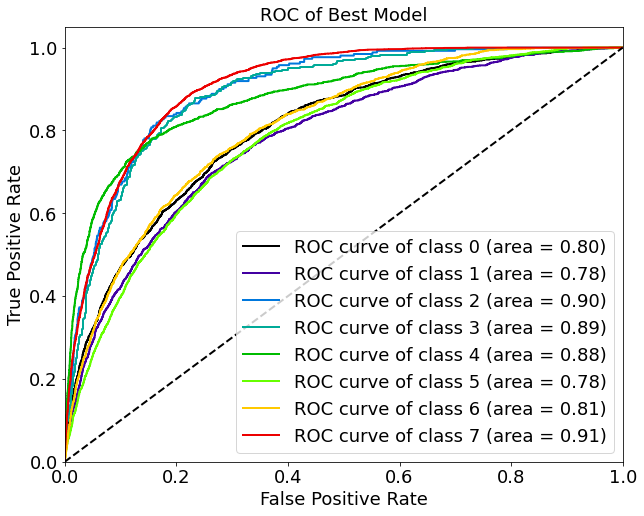

In [77]:
plot_roc(Y_valid_transformed, Pred_valid_probab, plot_micro=False, plot_macro=False, figsize=(10,8), title_fontsize="large", text_fontsize="large")
plt.title('ROC of Best Model')

# Classification Report

In [78]:
print(classification_report(Y_valid_transformed, Pred_valid))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1602
         1.0       0.27      0.12      0.17      1636
         2.0       0.02      0.04      0.03       260
         3.0       0.00      0.00      0.00       359
         4.0       0.00      0.00      0.00      1361
         5.0       0.09      0.05      0.06      2771
         6.0       0.12      0.24      0.16      1996
         7.0       0.12      0.04      0.06      4861
         8.0       0.00      0.00      0.00         0

    accuracy                           0.07     14846
   macro avg       0.07      0.05      0.05     14846
weighted avg       0.10      0.07      0.07     14846



## Confusion Matrix of Best Model

Text(0.5, 1.0, 'Confusion Matrix of Best Model')

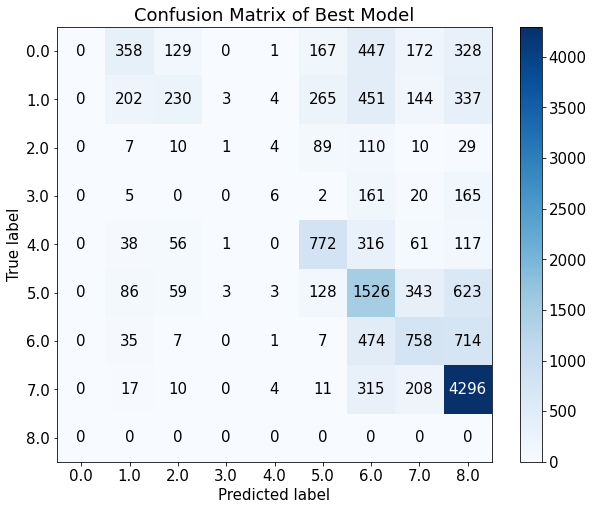

In [82]:
plot_confusion_matrix(Y_valid_transformed, Pred_valid, figsize=(10,8))
plt.title('Confusion Matrix of Best Model')

## Balanced Accuracy Score of Best Model

In [80]:
balanced_score = balanced_accuracy_score(Y_valid_transformed, Pred_valid)

print('Balanced Accuracy Score of Best Model: ',balanced_score)

Balanced Accuracy Score of Best Model:  0.061048828836282626
